In [ ]:
## Install pycaret library
!pip install pycaret

     |████████████████████████████████| 288 kB 4.8 MB/s 
     |████████████████████████████████| 1.3 MB 41.2 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 113 kB 39.9 MB/s 
     |████████████████████████████████| 167 kB 64.7 MB/s 
     |████████████████████████████████| 261 kB 68.6 MB/s 
     |████████████████████████████████| 1.7 MB 34.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 22.0 MB/s 
     |████████████████████████████████| 2.0 MB 11.4 MB/s 
     |████████████████████████████████| 15.5 MB 33.0 MB/s 
     |████████████████████████████████| 62 kB 791 kB/s 
     |████████████████████████████████| 596 kB 44.9 MB/s 
     |████████████████████████████████| 10.1 MB 26.3 MB/s 
     |██████████████████

In [ ]:
import pandas as pd
import pycaret
import os
from pycaret.classification import *

In [ ]:
%%bash
git clone https://github.com/ZhuoqunWang0120/cs671kaggle.git


Cloning into 'cs671kaggle'...


In [ ]:
train_data = pd.read_csv('data/train.csv')

In [ ]:
train_data.isnull().sum()

id                        0
Decision                  0
Driving_to                0
Passanger                 0
Weather                   0
Temperature               0
Time                      0
Coupon                    0
Coupon_validity           0
Gender                    0
Age                       0
Maritalstatus             0
Children                  0
Education                 0
Occupation                0
Income                    0
Bar                      93
Coffeehouse             182
Carryaway               125
Restaurantlessthan20    105
Restaurant20to50        151
Direction_same            0
Distance                  0
dtype: int64

In [ ]:
train_data = train_data.dropna()
train_data.Age = list(map(lambda s: s[0], train_data.Age.astype('str')))
train_data.Temperature = train_data.Temperature.astype('float')
# convert time to 24h unit
# def convert_time(t):
#  if t[-2:] == 'PM':
#    return int(t[:-2]) + 12
#  elif t[-2:] == 'AM':
#    return int(t[:-2])
#  else:
#    return None
#train_data.Time = train_data.Time.apply(convert_time)

In [ ]:
train_data.Time.value_counts()

6PM     2491
7AM     2401
10AM    1751
10PM    1528
2PM     1518
Name: Time, dtype: int64

In [ ]:
models = setup(data = train_data, target = "Decision", session_id = 0)

,Description,Value
0,session_id,0
1,Target,Decision
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9689, 23)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7431,0.8024,0.8240,0.7500,0.7851,0.4677,0.4712,1.153
lightgbm,Light Gradient Boosting Machine,0.7340,0.7996,0.8215,0.7400,0.7785,0.4479,0.4519,0.208
et,Extra Trees Classifier,0.7330,0.7931,0.7968,0.7501,0.7725,0.4499,0.4515,1.210
gbc,Gradient Boosting Classifier,0.7190,0.7773,0.8189,0.7240,0.7684,0.4146,0.4199,1.275
ada,Ada Boost Classifier,0.6830,0.7308,0.7746,0.7005,0.7355,0.3424,0.3452,0.417
ridge,Ridge Classifier,0.6818,0.0000,0.7678,0.7017,0.7331,0.3412,0.3435,0.036
lda,Linear Discriminant Analysis,0.6817,0.7299,0.7668,0.7019,0.7327,0.3411,0.3433,0.129
lr,Logistic Regression,0.6791,0.7253,0.7694,0.6982,0.7318,0.3348,0.3376,0.619
dt,Decision Tree Classifier,0.6514,0.6445,0.6947,0.6934,0.6939,0.2891,0.2893,0.087
nb,Naive Bayes,0.6362,0.6726,0.6515,0.6918,0.6709,0.2651,0.2658,0.037


In [ ]:
rf = create_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7393,0.7864,0.8083,0.7518,0.7790,0.4623,0.4641
1,0.7187,0.7947,0.8031,0.7294,0.7645,0.4173,0.4203
2,0.7345,0.7840,0.8420,0.7320,0.7831,0.4452,0.4525
3,0.7788,0.8305,0.8238,0.7950,0.8092,0.5462,0.5467
4,0.7345,0.7988,0.8238,0.7395,0.7794,0.4485,0.4526
5,0.7670,0.8305,0.8342,0.7740,0.8030,0.5188,0.5209
6,0.7404,0.7920,0.8264,0.7453,0.7838,0.4612,0.4651
7,0.7552,0.8190,0.8187,0.7670,0.7920,0.4953,0.4968
8,0.7360,0.7967,0.8342,0.7368,0.7825,0.4499,0.4556
9,0.7271,0.7917,0.8260,0.7294,0.7747,0.4322,0.4376


In [ ]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7187,0.7650,0.8472,0.7124,0.7740,0.4089,0.4198
1,0.6966,0.7406,0.8497,0.6891,0.7610,0.3579,0.3728
2,0.7021,0.7490,0.8575,0.6925,0.7662,0.3682,0.3845
3,0.7286,0.7887,0.8368,0.7275,0.7783,0.4329,0.4400
4,0.7094,0.7512,0.8368,0.7068,0.7663,0.3894,0.3992
5,0.7242,0.7946,0.8342,0.7236,0.7750,0.4234,0.4306
6,0.6947,0.7592,0.8290,0.6941,0.7556,0.3573,0.3674
7,0.7124,0.7751,0.8135,0.7185,0.7631,0.4008,0.4058
8,0.6917,0.7481,0.8187,0.6945,0.7515,0.3528,0.3611
9,0.6917,0.7601,0.8545,0.6826,0.7589,0.3460,0.3632


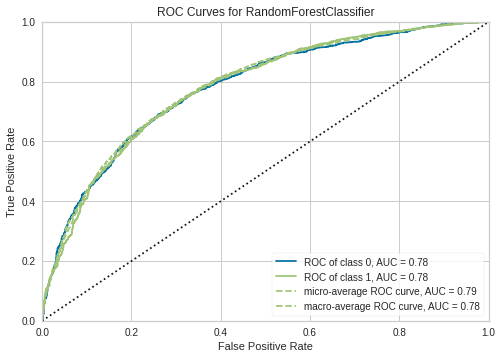

In [ ]:
plot_model(tuned_rf, plot = 'auc')


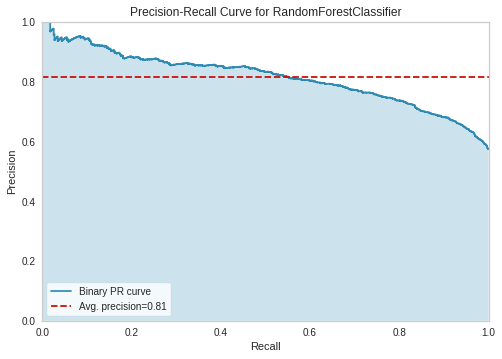

In [ ]:
plot_model(tuned_rf, plot = 'pr')


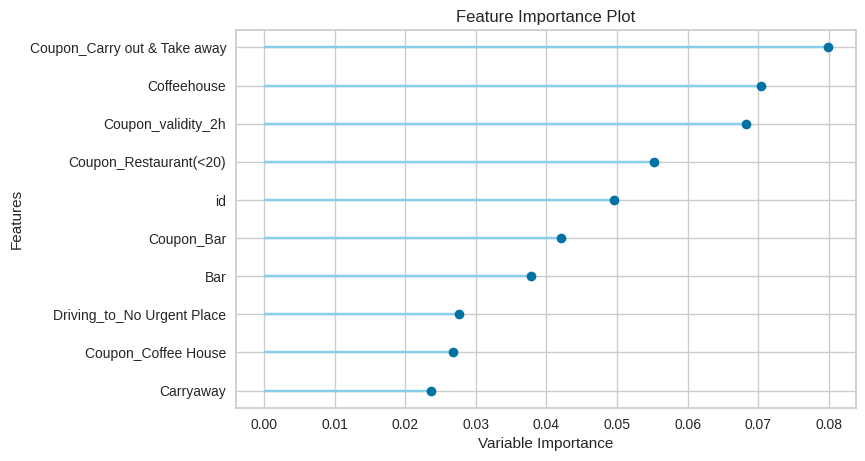

In [ ]:
plot_model(tuned_rf, plot='feature')


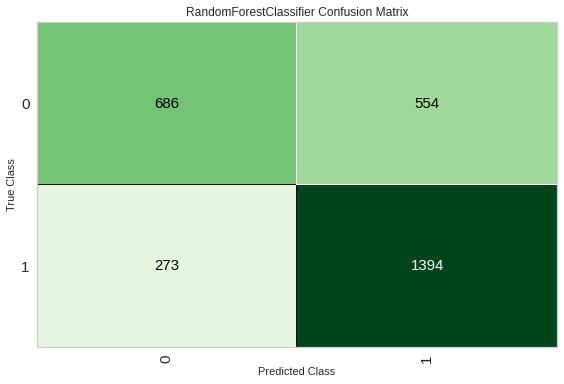

In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix')


In [ ]:
final_rf = finalize_model(tuned_rf)


In [ ]:
print(final_rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=11, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [53]:
save_model(final_rf,"RF2")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Decision',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=11, max_features='log2',
                                         max_le

Ridge classifier


In [57]:
ridge = create_model('ridge')
tuned_ridge = tune_model(ridge)
final_ridge = finalize_model(tuned_ridge)
save_model(final_ridge,"ridge1_submission3")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6760,0.0,0.7798,0.6904,0.7324,0.3257,0.3296
1,0.6834,0.0,0.7850,0.6966,0.7381,0.3413,0.3453
2,0.6726,0.0,0.7772,0.6881,0.7299,0.3181,0.3219
3,0.7153,0.0,0.7720,0.7395,0.7554,0.4154,0.4159
4,0.6726,0.0,0.7332,0.7040,0.7183,0.3278,0.3282
5,0.7021,0.0,0.7824,0.7190,0.7494,0.3837,0.3858
6,0.7021,0.0,0.7850,0.7180,0.7500,0.3832,0.3855
7,0.6785,0.0,0.7435,0.7069,0.7247,0.3388,0.3394
8,0.6652,0.0,0.7591,0.6862,0.7208,0.3054,0.3078
9,0.6504,0.0,0.7610,0.6689,0.7120,0.2720,0.2757


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Decision',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                 ('fix_perfect', Remove_100(target='Decision')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
       

LightGBM


In [60]:
lightgbm = create_model('lightgbm')
tuned_lightgbm = tune_model(lightgbm)
final_lightgbm = finalize_model(tuned_lightgbm)
save_model(final_lightgbm,"lightgbm1_submission4")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7187,0.7692,0.8005,0.7305,0.7639,0.4178,0.4205
1,0.7040,0.7862,0.7824,0.7208,0.7503,0.3883,0.3903
2,0.7212,0.7736,0.8446,0.7165,0.7753,0.4147,0.4245
3,0.7537,0.8173,0.8290,0.7601,0.7931,0.4903,0.4931
4,0.7212,0.7793,0.8161,0.7275,0.7692,0.4202,0.4246
5,0.7581,0.8247,0.8264,0.7668,0.7955,0.5005,0.5026
6,0.7286,0.7888,0.8187,0.7349,0.7745,0.4362,0.4403
7,0.7493,0.8197,0.8109,0.7634,0.7864,0.4835,0.4848
8,0.7242,0.7766,0.8290,0.7256,0.7739,0.4244,0.4306
9,0.7242,0.7775,0.8312,0.7240,0.7739,0.4247,0.4313


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Decision',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=1.0,
                                 importance_type='split', learning_rate=0.2,
                                 max_depth=-1,

In [ ]:
test_data = pd.read_csv('data/test.csv')
# test_data = test_data.dropna()
test_data.Age = list(map(lambda s: s[0], test_data.Age.astype('str')))
test_data.Temperature = test_data.Temperature.astype('float')
# convert time to 24h unit
# def convert_time(t):
#  if t[-2:] == 'PM':
#    return int(t[:-2]) + 12
#  elif t[-2:] == 'AM':
#    return int(t[:-2])
#  else:
#    return None
#train_data.Time = train_data.Time.apply(convert_time)

In [ ]:
pred2 = predict_model(final_rf, data=test_data)
sub2 = pd.DataFrame({'id': test_data.id, 'Decision': pred2.Label})
sub2.to_csv('sub2.csv',index=False, header='sub2')

In [58]:
pred3 = predict_model(final_ridge, data=test_data)
sub3 = pd.DataFrame({'id': test_data.id, 'Decision': pred3.Label})
sub3.to_csv('sub3.csv',index=False, header='sub3')

In [61]:
pred4 = predict_model(final_lightgbm, data=test_data)
sub4 = pd.DataFrame({'id': test_data.id, 'Decision': pred4.Label})
sub4.to_csv('sub4.csv',index=False, header='sub4')




In [59]:
sum(pred2.Label != pred3.Label)

409

In [ ]:
save_model(best_model,"RF1")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Decision',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

In [ ]:
saved_model=load_model('RF1')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
y_pred = saved_model.predict(test_data)

In [ ]:
sub1 = pd.DataFrame({'id': test_data.id, 'Decision': y_pred})


In [ ]:
sub1.to_csv('sub1.csv',index=False, header='sub1')

In [ ]:
pd.read_csv('sub1.csv')

,id,Decision
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
2495,2496,1
2496,2497,0
2497,2498,1
2498,2499,1


In [ ]:
pd.read_csv('data/sample_submission1.csv')

,id,Decision
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2495,2496,0
2496,2497,0
2497,2498,0
2498,2499,0


In [ ]:
%%bash
git add .
git commit -m "first submission"

[main 960ee7c] first submission
 5 files changed, 4583 insertions(+)
 create mode 100644 RF1.pkl
 rename train.csv => data/train.csv (100%)
 create mode 100644 logs.log
 create mode 100644 sub1.csv
 create mode 100644 untitled


In [ ]:
%%bash
git push .

Everything up-to-date
